<a href="https://colab.research.google.com/github/sejallotliker/Machine_learning_practice/blob/main/titenic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score,
                             f1_score, roc_curve, roc_auc_score, precision_recall_curve)


from sklearn.model_selection import train_test_split

In [89]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [91]:
#To see if there are any missing values in the dataset or not:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [92]:
# Select features and target variable
features = ['pclass', 'age', 'fare', 'sex', 'embarked']
X = df[features]
y = df['survived']

In [93]:
X.head()

,pclass,age,fare,sex,embarked
0,3,22.0,7.2500,male,S
1,1,38.0,71.2833,female,C
2,3,26.0,7.9250,female,S
3,1,35.0,53.1000,female,S
4,3,35.0,8.0500,male,S


In [94]:
y.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [95]:
X.isnull().sum()

,0
pclass,0
age,177
fare,0
sex,0
embarked,2


In [96]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [97]:
#To create pipeline:

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [98]:
Numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [99]:
Categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

In [100]:
columns_numerical = X.select_dtypes(include=[np.number]).columns.to_list()
columns_nonnumerical = X.select_dtypes(exclude=[np.number]).columns.to_list()
columns_numerical, columns_nonnumerical

(['pclass', 'age', 'fare'], ['sex', 'embarked'])

In [101]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([
    ("numerical", Numerical_preprocessor, columns_numerical),
    ("nonnumerical", Categorical_preprocessor, columns_nonnumerical)
    ])

In [102]:
X_preprocessed = preprocessor.fit_transform(X_train)

In [103]:
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logistic_regression', LogisticRegression())
])

In [104]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['pclass', 'age', 'fare']),
                                                 ('nonnumerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['sex', 'embarked'])])),
                ('logistic_regression', LogisticRegression())])

In [105]:
y_prob = full_pipeline.predict_proba(X_test)[:, 1]
yhat_test = (y_prob >= 0.5).astype(int)

In [106]:
from sklearn.metrics import root_mean_squared_error as rmse
lr_test_rmse = rmse(y_test, yhat_test)
lr_test_rmse

0.4530164242022743

In [107]:
#Compute Confusion matrix:

def all_metrics(y_test, yhat_test):

  cm = confusion_matrix(y_test, yhat_test)
  acc = accuracy_score(y_test, yhat_test)
  prec = precision_score(y_test, yhat_test)
  rec = recall_score(y_test, yhat_test)
  f1 = f1_score(y_test, yhat_test)

  print("Confusion Matrix:\n", cm)
  print("Accuracy:", acc)
  print("Precision:", prec)
  print("Recall (Sensitivity):", rec)
  print("F1 Score:", f1)

all_metrics(y_test, yhat_test)

Confusion Matrix:
 [[132  25]
 [ 30  81]]
Accuracy: 0.7947761194029851
Precision: 0.7641509433962265
Recall (Sensitivity): 0.7297297297297297
F1 Score: 0.7465437788018433


In [108]:
conf_matrix= confusion_matrix(y_test, yhat_test)

def get_f1_score_accuracy_score(conf_matrix):
    true_negative  = conf_matrix[1][1]
    false_positive = conf_matrix[0][1]
    false_negative = conf_matrix[1][0]
    true_positive = conf_matrix[0][0]

    precision = true_positive / (true_positive + false_positive)
    recall = true_positive/ (true_positive + false_negative)

    f1_score = (2 * (precision * recall)) / (precision + recall )

    sum_all_elements_of_confusion_matrix = np.concatenate(conf_matrix).sum()

    accuracy_score = (true_positive + true_negative)/sum_all_elements_of_confusion_matrix

    return f1_score, accuracy_score, precision, recall

print(f'F1 Score: {get_f1_score_accuracy_score(conf_matrix)[0]}')
print(f'Accuracy Score: {get_f1_score_accuracy_score(conf_matrix)[1]}')
print(f'Precision: {get_f1_score_accuracy_score(conf_matrix)[2]}')
print(f'Recall: {get_f1_score_accuracy_score(conf_matrix)[3]}')

F1 Score: 0.8275862068965518
Accuracy Score: 0.7947761194029851
Precision: 0.8407643312101911
Recall: 0.8148148148148148


In [109]:
conf_matrix

array([[132,  25],
       [ 30,  81]])

In [110]:
# Compute F-beta scores
def f_beta(beta):
    true_negative  = conf_matrix[1][1]
    false_positive = conf_matrix[0][1]
    false_negative = conf_matrix[1][0]
    true_positive = conf_matrix[0][0]

    precision = true_positive / (true_positive + false_positive)
    recall = true_positive/ (true_positive + false_negative)
    return (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

f2 = f_beta(2)
print("F2 Score:", f2)

F2 Score: 0.8198757763975155


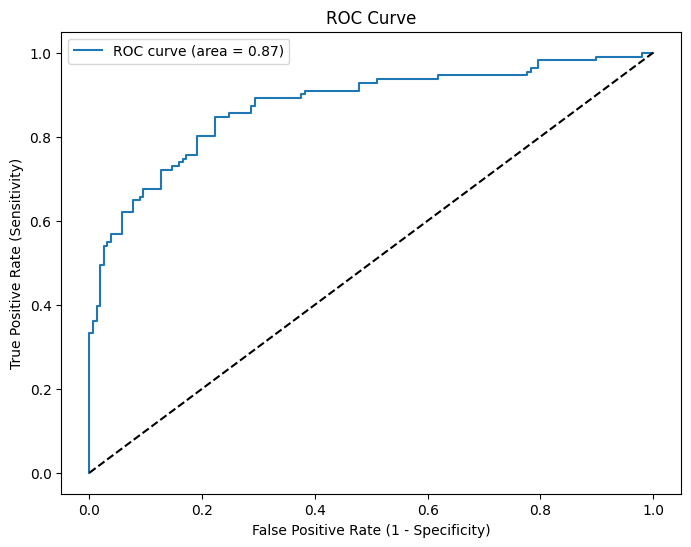

In [116]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [117]:
# Sensitivity vs. Specificity Curve and Optimal Threshold (Youden's Index)
specificity = 1 - fpr
youden_index = tpr + specificity - 1
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold based on Youden's Index:", optimal_threshold)

Optimal Threshold based on Youden's Index: 0.3610873670300591


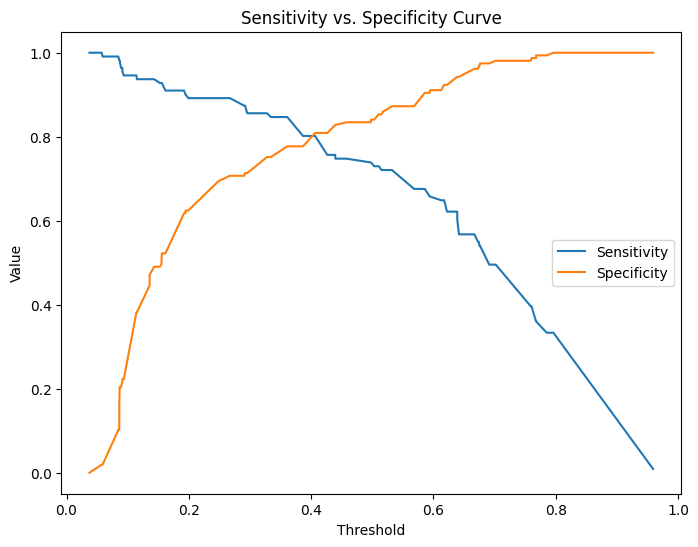

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(thresholds, tpr, label='Sensitivity')
plt.plot(thresholds, specificity, label='Specificity')
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Sensitivity vs. Specificity Curve')
plt.legend()
plt.show()

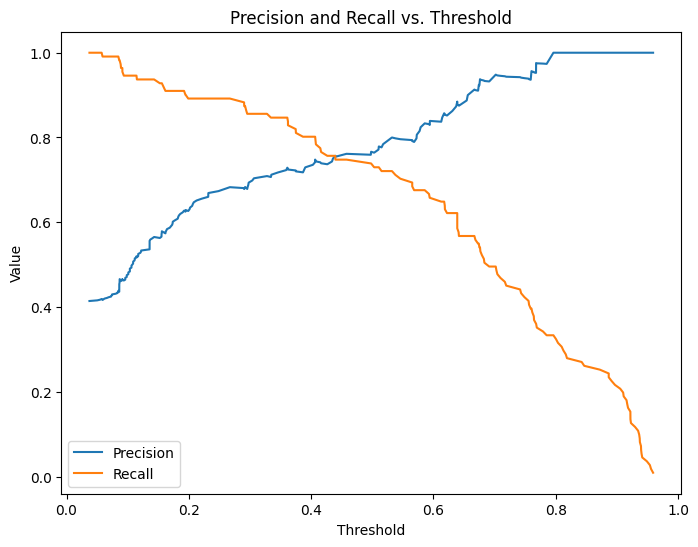

In [119]:
# Compute precision, recall, and thresholds using precision_recall_curve
precisions, recalls, pr_thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8,6))
# Note: precision_recall_curve returns arrays with length = len(thresholds)+1, so we slice to match the thresholds.
plt.plot(pr_thresholds, precisions[:-1], label='Precision')
plt.plot(pr_thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.show()

KS Statistic: 0.6239169105411144


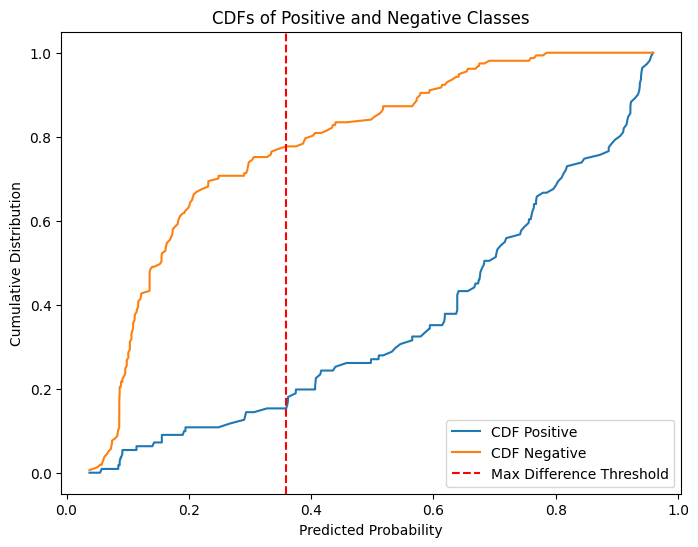

In [120]:
# Compute KS Statistic and Plot CDFs for Positive and Negative Classes
data = pd.DataFrame({'y_true': y_test, 'y_prob': y_prob})
data = data.sort_values(by='y_prob')
data['cum_positive'] = np.cumsum(data['y_true']) / data['y_true'].sum()
data['cum_negative'] = np.cumsum(1 - data['y_true']) / (1 - data['y_true']).sum()
ks_stat = np.max(np.abs(data['cum_positive'] - data['cum_negative']))
print("KS Statistic:", ks_stat)

plt.figure(figsize=(8,6))
plt.plot(data['y_prob'], data['cum_positive'], label='CDF Positive')
plt.plot(data['y_prob'], data['cum_negative'], label='CDF Negative')
max_idx = np.argmax(np.abs(data['cum_positive'] - data['cum_negative']))
plt.axvline(x=data['y_prob'].iloc[max_idx], color='red', linestyle='--', label='Max Difference Threshold')
plt.xlabel('Predicted Probability')
plt.ylabel('Cumulative Distribution')
plt.title('CDFs of Positive and Negative Classes')
plt.legend()
plt.show()